# Collect images

You will collect several sets of images to cover the whole image area for each camera for different rotations of the pattern and distances from the rig to the pattern.
Use the following board orientations when asked.
<div>
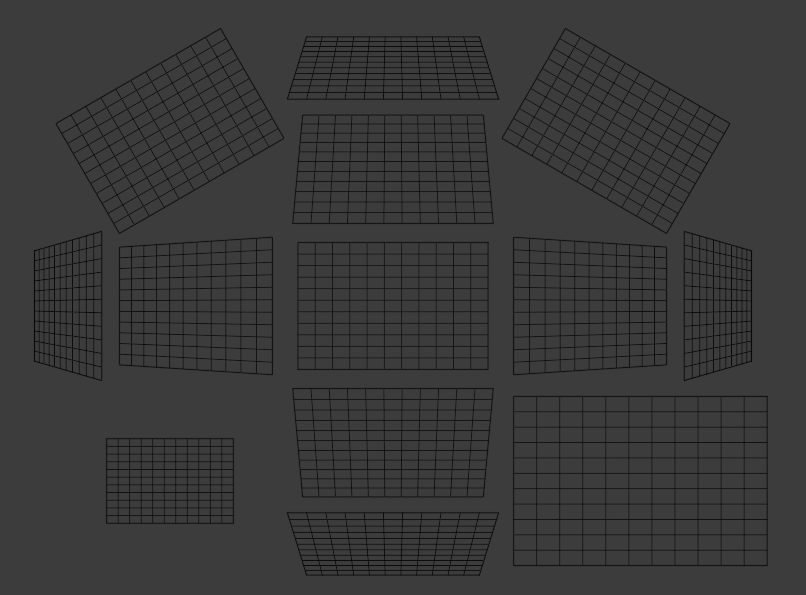
</div>

## Preparations

Once after staring the PC, increase USBFS buffer size and check it.
```bash
echo 1024 | sudo tee /sys/module/usbcore/parameters/usbfs_memory_mb
sudo cat /sys/module/usbcore/parameters/usbfs_memory_mb
```

In the shell run
```bash
adb devices
```
there has to be two different serial numbers.
If the numbers are not `0000000000000001` and `0000000000000002`, run
```bash
for transport_id in $(adb devices -l | head -n3 | tail -n2 | cut -d' ' -f11 | cut -d':' -f2); do adb -t $transport_id shell sh /sdcard/set_serial.sh; done
```
Then plug the phones out and in, and check the serial numbers again.

In [ ]:
import datetime
from time import sleep
import sys

sys.stderr = sys.__stderr__  # redirect stderr back to the shell

sys.path.append('/home/universal/Downloads/dev.sk_robot_rgbd_data/src')
from skrgbd.calibration.calibration_helper.small_scale_sphere import SmallScaleSphereCalibrationHelper
from skrgbd.devices.phone import convert_bin_to_img

In [ ]:
calib_root = '/home/universal/Downloads/dev.sk_robot_rgbd_data/experiments/calibration/images'

In [ ]:
calib_helper = SmallScaleSphereCalibrationHelper(calib_root)

1. Clean the calibration images on the phones if necessary.

2. Setup the cameras for the light conditions during calibration.

In [ ]:
calib_helper.setup_cameras()

3. Warm up the cameras for 1 hour.
   If you need to stop the calibration procedure and proceed after a while,
   re-warm the cameras again.

In [ ]:
print(f'Started warmup at {datetime.datetime.now()}')
calib_helper.start_initial_warmup()

4. Perform the internal calibration of RealSense.

In [ ]:
calib_helper.do_internal_calibration()

5. Collect the images on the Camera Calibration Plane.

In [ ]:
calib_helper.calibrate_on_camera_plane([
    'front',
    'tilted_left',
    'tilted_right',
    'far',
    'close',
    'turned_left',
    'turned_left_left',
    'turned_right',
    'turned_right_right',
    'turned_up',
    'turned_up_up',
    'turned_down',
    'turned_down_down'
])

Here you can stop the phones and leave them charging during the next step.

6. Collect the images on the STL Calibration Plane.

In [ ]:
calib_helper.calibrate_on_stl_plane([
    'front',
    'tilted_left',
    'tilted_right',
    'far',
    'close',
    'turned_left',
    'turned_left_left',
    'turned_right',
    'turned_right_right',
    'turned_up',
    'turned_up_up',
    'turned_down',
    'turned_down_down'
])

If you stopped the phones before, restart the calibration procedure (restart the kernel), re-warm the phones, and proceed with the next step.

7. Collect the images on the Camera and STL Calibration Spheres.

In [ ]:
for board_pos in [
    'front',
    'tilted_left',
    'tilted_right',
    'turned_left',
    'turned_right',
    'turned_up',
    'turned_down',
]:
    calib_helper.calibrate_on_stl_sphere([board_pos])
    calib_helper.calibrate_on_camera_sphere([board_pos])

8. Collect the images on the Phone Calibration Plane with a different calibration board.

In [ ]:
calib_helper.calibrate_on_phone_ir_plane([
    'front',
    'tilted_left',
    'tilted_right',
    'far',
    'close',
    'turned_left',
    'turned_left_left',
    'turned_right',
    'turned_right_right',
    'turned_up',
    'turned_up_up',
    'turned_down',
    'turned_down_down'
])

9. Run the code below and leave it running. It will wait until the phones are fully charged,
   and then will download the calibration data to the PC.
   Don't forget to delete the calibration data on the phones after checking the data on the PC.

In [ ]:
calib_helper.stop()

In [ ]:
for phone in calib_helper.rig.phones:
#     while phone.battery_level < 90:
#         sleep(30 * 60)
    phone.pull_calibration(calib_root)
convert_bin_to_img(calib_root, calibration=True)